# Scikit-learn Overview

Python library for data mining and data analysis  
Built on NumPy, SciPy, and matplotlib  
Documentation: http://scikit-learn.org/stable/documentation.html

# Loading and Shaping Datasets

scikit-learns comes with a few standard datasets (iris and digits)  
each dataset is a dictionary-like object holding the data and metadata  
.data member stores the data as (n_samples, n_features)
.target member stores the response variables

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

## Investigate digits dataset

.data member contains the features used to classify the digit sample images  
each pixel is a feature  
there are 1797 image samples, each has 64 features (8x8 pixels)  
this is the same data that shows up in the .images member, but flattened into 1x64 shape

In [7]:
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


.target member contains the truth label for each image  
There are 1797 target variables

In [3]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ..., 8 9 8]


.target_names member has the name of each target variable (0-9 for each number)

In [4]:
print(digits.target_names.shape)
print(digits.target_names)

(10,)
[0 1 2 3 4 5 6 7 8 9]


.images member contains the actual image samples  
there are 1797 images which are 8x8 pixels
this is the same data from the .data member, but reshaped into an 8x8

In [10]:
print(digits.images.shape)
digits.images[0]

(1797, 8, 8)


array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Plot the above array as an image  
Create a second image which just shows grayscale  
Notice the light pixels are 0 in the array, dark pixels are closer to 15

## Plotting some data as images

use [pyplot](http://matplotlib.org/api/pyplot_api.html) to display the first and last images  
convert to grayscale to reduce the color data

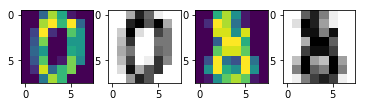

In [32]:
from matplotlib import pyplot as plt
plt.subplot(1,4,1)
plt.imshow(digits.images[0])
plt.subplot(1,4,2)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.subplot(1,4,3)
plt.imshow(digits.images[1796])
plt.subplot(1,4,4)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r)
plt.show()

# Learning and Predicting

an estimator is fit with training data in order to predict unseen samples  
scikit-learn uses a Python object which implements the fit(X,y) and predict(T) methods  
<b>support vector classification</b> ([sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) is an example <b>classification estimator</b>  
SVC has hyperparameters for gamma and C

In [40]:
from sklearn import svm
classifier = svm.SVC(gamma=0.001, C=100.)

the SVC is trainined (fit) with all of the data except the last item  
then use the SVC to predict what the last item should be classified as using this model

In [41]:
classifier.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
classifier.predict(digits.data[-1:])

array([8])

In [43]:
digits.target[1796]

8

# Results

The SVC correctly classifies the last image based on what is listed in the .target label